In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze


maze = gym.make('Maze4-v0')
situation = maze.reset()
maze.render()


■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ □ ■ A ■
■ ■ ■ ■ ■ ■ ■ ■


In [3]:
from lcs.agents.xcs import XCS, Configuration, Classifier
from lcs import Perception


def predicts_successfully(cl: Classifier, perception: Perception, action):
    if cl.does_match(perception):
        if cl.action == action:
            return True
    return False


def xcs_maze_knowledge(population, environment) -> float:
    transitions = environment.env.get_all_possible_transitions()
    nr_correct = 0

    for start, action, end in transitions:
        perception = environment.env.maze.perception(*start)
        if any([True for cl in population
                if predicts_successfully(cl, perception, action)]):
            nr_correct += 1
    return nr_correct / len(transitions)


def xcs_maze_metrics(xcs: XCS, environment):
    return {
        'numerosity': xcs.population.numerosity(),
        'knowledge': xcs_maze_knowledge(xcs.population, environment),
        'population': len(xcs.population)
    }


cfg = Configuration(theta_mna=2,
                    user_metrics_collector_fcn=xcs_maze_metrics)

agent = XCS(cfg)
population, explore_metrics = agent.explore(maze, 1000)
agent = XCS(cfg, population)
population, exploit_metrics = agent.exploit(maze, 200)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': 0, 'numerosity': 8, 'knowledge': 0.017391304347826087, 'population': 4}


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 2, 'reward': 1000, 'numerosity': 70, 'knowledge': 0.24347826086956523, 'population': 50}


INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 6, 'reward': 1000, 'numerosity': 72, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 4, 'reward': 1000, 'numerosity': 72, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': 0, 'numerosity': 72, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 50, 'reward': 0, 'numerosity': 72, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 5, 'reward': 1000, 'numerosity': 76, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 50, 'reward': 0, 'numerosity': 76, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': 0, 'numerosity': 76, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 900, 'steps_in_trial': 50, 'reward': 0, 'numerosity': 76, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': 0, 'numerosity': 78, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 20, 'steps_in_trial': 50, 'reward': 0, 'numerosity': 82, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 40, 'steps_in_trial': 50, 'reward': 0, 'numerosity': 84, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 60, 'steps_in_trial': 3, 'reward': 1000, 'numerosity': 84, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 80, 'steps_in_trial': 2, 'reward': 1000, 'numerosity': 84, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 50, 'reward': 0, 'numerosity': 84, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 120, 'steps_in_trial': 1, 'reward': 1000, 'numerosity': 84, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 140, 'steps_in_trial': 50, 'reward': 0, 'numerosity': 84, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 160, 'steps_in_trial': 2, 'reward': 1000, 'numerosity': 84, 'knowledge': 0.25217391304347825, 'population': 52}


INFO:lcs.agents.Agent:{'trial': 180, 'steps_in_trial': 4, 'reward': 1000, 'numerosity': 84, 'knowledge': 0.25217391304347825, 'population': 52}


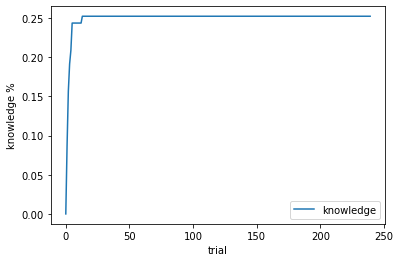

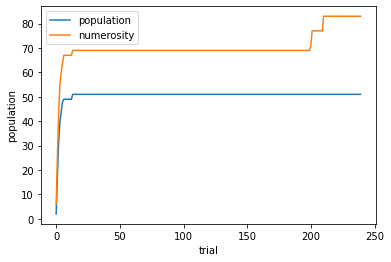

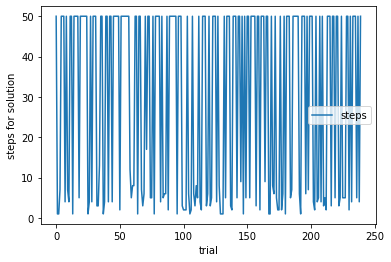

In [9]:
import pandas as pd

df = pd.DataFrame([metric["knowledge"] for metric in explore_metrics] +
                  [metric["knowledge"] for metric in exploit_metrics])
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge"])

df = pd.DataFrame(zip(
                [metric["population"] for metric in explore_metrics] +
                [metric["population"] for metric in exploit_metrics],
                [metric["numerosity"] for metric in explore_metrics] +
                [metric["numerosity"] for metric in exploit_metrics]
                ))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["population", "numerosity"])

df = pd.DataFrame([metric["steps_in_trial"] for metric in explore_metrics] +
                  [metric["steps_in_trial"] for metric in exploit_metrics])
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])

